## Demo for learning single channel PSF from bead data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{psftype}}$:  `'voxel', 'zernike'`  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_user')
```

In [24]:
L = psflearninglib()
L.param = io.param.combine('config_base',psftype='zernike',channeltype='1ch',sysfile='M2')


##### Edit user defined parameters

In [25]:
L.param.datapath = 'E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional/'
L.param.savename = L.param.datapath + 'psfmodel'
L.param.keyword = 'Pos' # keyword for your data file
L.param.subfolder = 'Pos' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 1
L.param.ccd_offset = 400
L.param.FOV.z_step = 5  
L.param.pixel_size.z = 0.05 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.max_bead_number = 30 # lower this number if out of memory 

Optional parameters for zernike PSF learning, change cell type to $\small\color{#318CE7}{\mathrm{Python}}$ to activate the cell  
Parameter | Options | Default
--- | --- | ---
$\small\color{skyblue}{\mathrm{PSFtype}}$   | `'zernike', 'zernike_vector', 'pupil', 'pupil_vector'` | `'zernike_vector'`


##### Start learning

In [26]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
for k in range(0,1): # increase iteration number if necessary
    psfobj,fitter = L.learn_psf(dataobj,time=0)
resfile = L.save_result(psfobj,dataobj,fitter)

E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos0_30ms_conventional_Z_1\Pos0_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos1_30ms_conventional_Z_1\Pos1_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos10_30ms_conventional_Z_1\Pos10_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos11_30ms_conventional_Z_1\Pos11_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos2_30ms_conventional_Z_1\Pos2_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos3_30ms_conventional_Z_1\Pos3_30ms_conventional_Z_1_MMStack_Default.om

3/6: learning: 209/250 [00:26s]  7.75it/s, current loss: 0.74492, total time: 26.97s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.91s/it total time: 28.87s
5/6: localization: 5/5 [00:00s] 10.82it/s total time: 29.33s


outlier id: [ 0  3  5 10 15 16 19 25]
rois shape channel : (22, 48, 21, 21)


3/6: learning: 107/250 [00:11s]  9.11it/s, current loss: 0.67502, total time: 41.07s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.88s/it total time: 42.95s
5/6: localization: 5/5 [00:00s] 10.03it/s total time: 43.45s
6/6: saving results: [00:00s] total time: 43.54s


##### Show results

In [27]:
f,p = io.h5.load(resfile) # load result file

In [28]:
print('output parameters')
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

output parameters
f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'loc']
 res:
     ['I_model', 'apodization', 'bg', 'cor', 'cor_all', 'drift_rate', 'intensity', 'offset', 'pos', 'pupil', 'sigma', 'zernike_coeff', 'zernike_polynomial']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']


In [30]:
f.res.sigma

array([1.0786059, 1.1504234], dtype=float32)

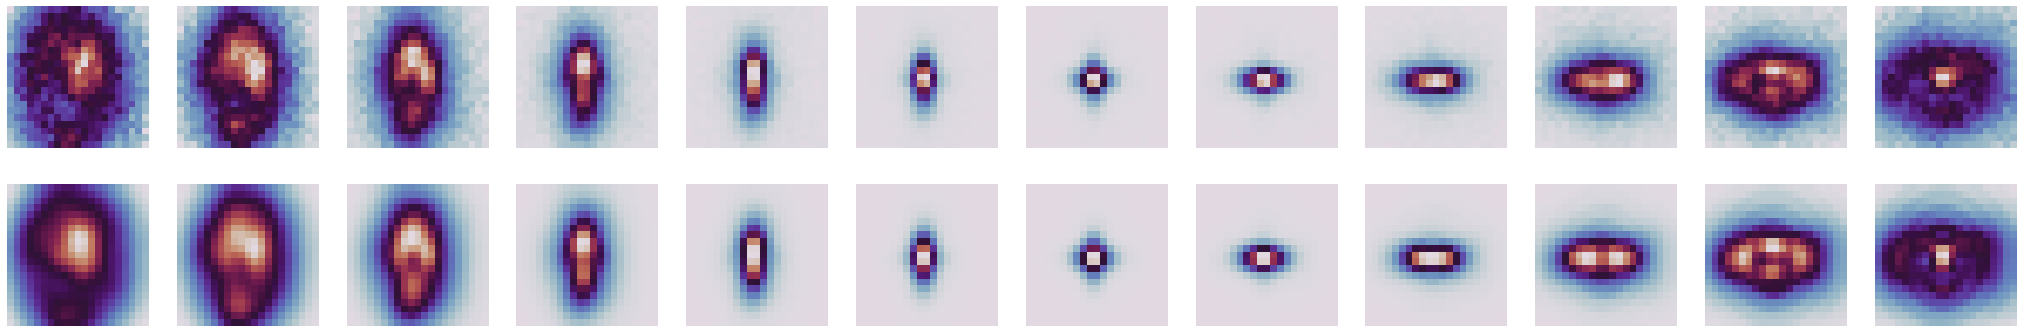

In [31]:
showpsfvsdata(f,p,index=0)

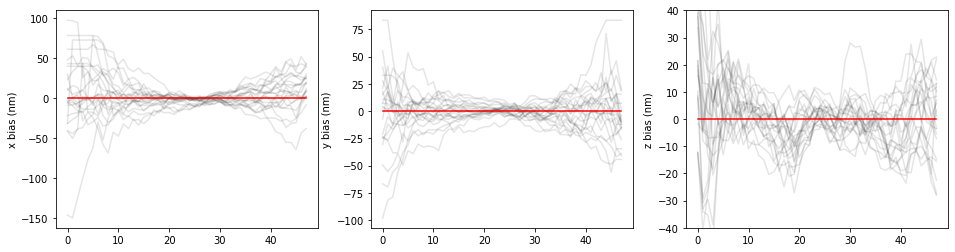

In [32]:
showlocalization(f,p)

##### Optional plots

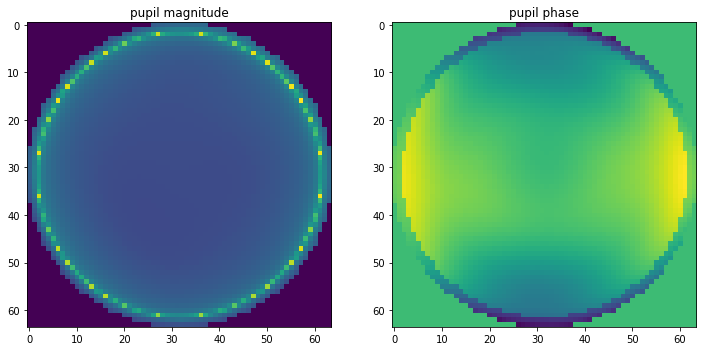

In [33]:
try:
    showpupil(f,p)
except:
    print('no pupil')

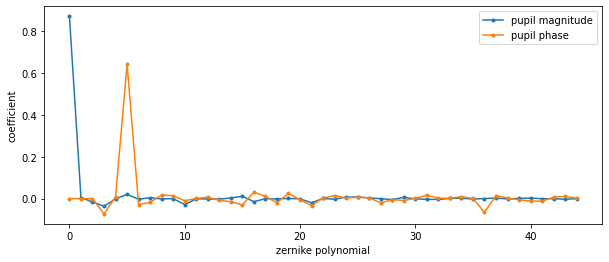

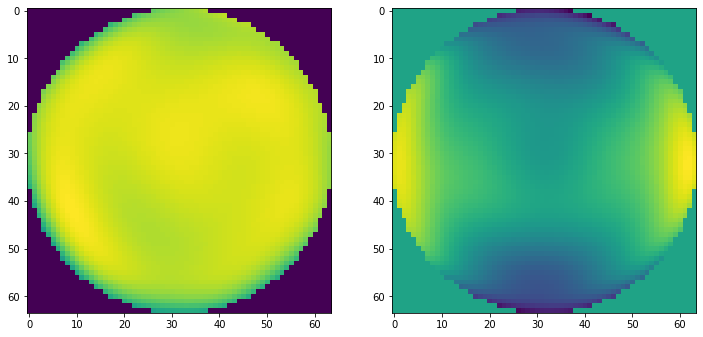

In [34]:
try:
    showzernike(f,p)
except:
    print('no Zernike coefficients')

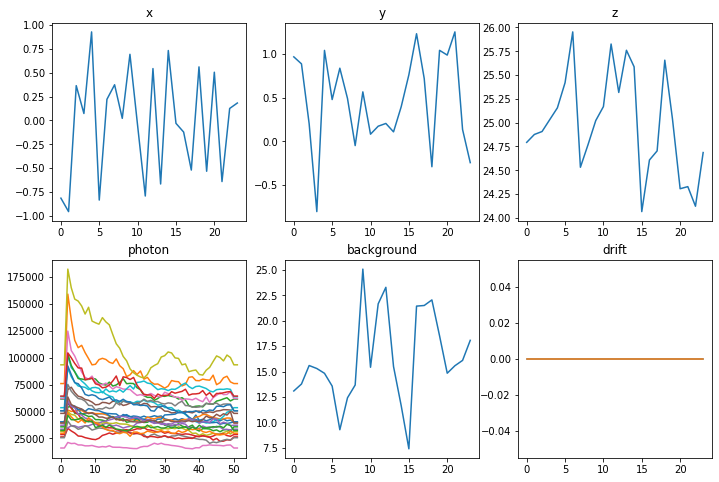

In [13]:
showlearnedparam(f,p)